In [ ]:
## Initial data analysis

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [91]:
df = pd.read_csv("data//bodyPerformance.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


Note that dataset contains only non-null variables due to filtering.
But if we encounter one then we can:
- delete if there is small amount of null values
- take median/average value or do simple prediction ex. KNN
- consult with subject-matter expert

In [102]:
df['gender_encoded'] = df['gender'].map({'M': 0, 'F': 1})
class_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df['class_encoded'] = df['class'].map(class_mapping)
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.head(3)

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,gender_encoded,class_encoded
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,0,2
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,0,2


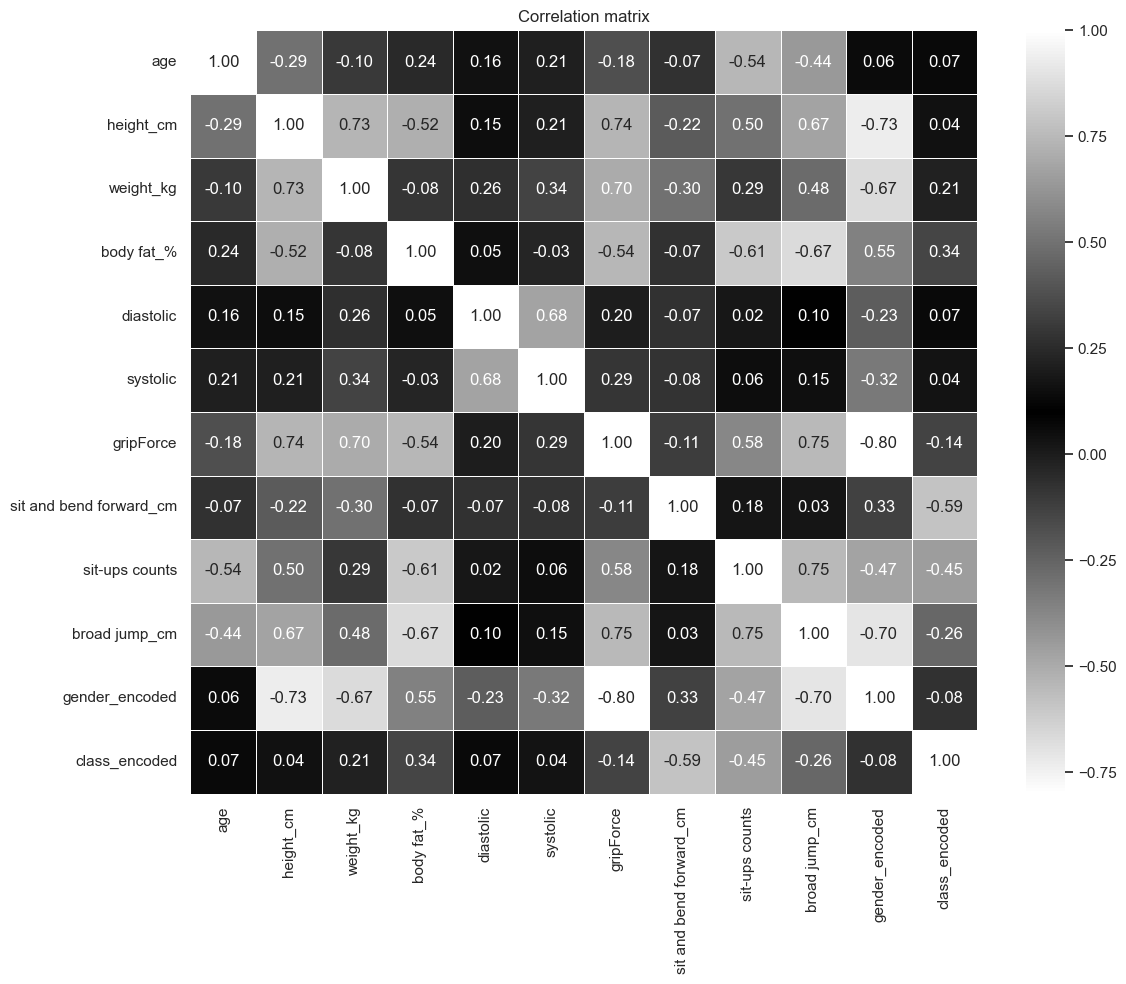

In [103]:
corr_matrix = numeric_df.corr()

colors_wbw = ["white", "black", "white"]

cmap_custom = LinearSegmentedColormap.from_list("black_white_black_map", colors_wbw)
plt.figure(figsize=(12, 10))
plt.title('Correlation matrix')
sns.heatmap(corr_matrix, annot=True, cmap=cmap_custom, fmt=".2f", linewidths=0.5)
plt.tight_layout()

In [104]:
df['class'].value_counts(normalize=True) * 100

class
C    25.005600
D    25.005600
A    24.998133
B    24.990667
Name: proportion, dtype: float64

The classes are proportional, so we do not need to assign additional weights to them.i

### Train/test split

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(numeric_df.drop(columns=['class_encoded']),numeric_df['class_encoded'] , stratify=numeric_df['class_encoded'], random_state=42)

train_combined = pd.concat([X_train, y_train], axis=1)
test_combined = pd.concat([X_test, y_test], axis=1)

train_combined.to_csv('data/train.csv', index=False)
test_combined.to_csv('data/test.csv', index=False)


### Visual Exploratory Data Analysis (EDA)

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

import warnings
warnings.filterwarnings('ignore')

In [111]:
df = pd.read_csv('data/train.csv')

print(f"Shape of dataset: {df.shape}")
print("\n--- Data Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
display(df.describe().T)

missing = df.isnull().sum()
print(f"\nMissing values:\n{missing[missing > 0]}")

Shape of dataset: (10044, 12)

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      10044 non-null  float64
 1   height_cm                10044 non-null  float64
 2   weight_kg                10044 non-null  float64
 3   body fat_%               10044 non-null  float64
 4   diastolic                10044 non-null  float64
 5   systolic                 10044 non-null  float64
 6   gripForce                10044 non-null  float64
 7   sit and bend forward_cm  10044 non-null  float64
 8   sit-ups counts           10044 non-null  float64
 9   broad jump_cm            10044 non-null  float64
 10  gender_encoded           10044 non-null  int64  
 11  class_encoded            10044 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 941.8 KB

--- Descriptive Statistics ---


,count,mean,std,min,25%,50%,75%,max
age,10044.0,36.680406,13.563772,21.0,25.00,32.0,48.0,64.0
height_cm,10044.0,168.586300,8.403939,125.0,162.50,169.1,174.8,193.8
weight_kg,10044.0,67.426573,11.963567,26.3,58.20,67.4,75.4,138.1
body fat_%,10044.0,23.192707,7.260679,3.0,18.00,22.8,28.0,78.4
diastolic,10044.0,78.705287,10.793106,0.0,71.00,79.0,86.0,126.0
systolic,10044.0,130.159687,14.760497,0.0,120.00,130.0,141.0,201.0
gripForce,10044.0,36.943380,10.639280,0.0,27.50,37.9,45.1,70.5
sit and bend forward_cm,10044.0,15.145393,8.423070,-25.0,10.80,16.1,20.7,213.0
sit-ups counts,10044.0,39.832796,14.321407,0.0,30.00,42.0,51.0,80.0
broad jump_cm,10044.0,190.283353,39.816451,0.0,162.00,193.0,222.0,303.0



Missing values:
Series([], dtype: int64)



Analyzing Feature: age


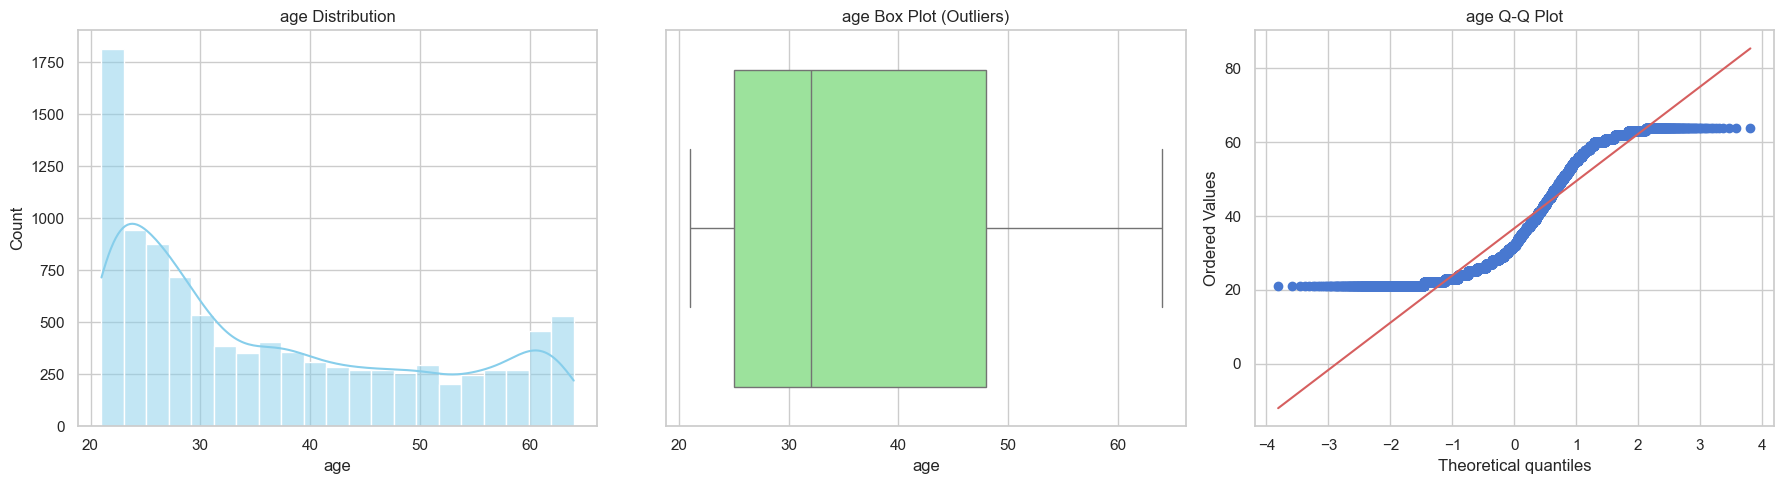

Statistics for age:
 - Skewness: 0.6149 (0 = symmetric)
 - Kurtosis: -0.9858 (3 = normal for Pearson definition, 0 for Fisher)
 - Shapiro-Wilk Test: Statistic=0.8889, p-value=1.61e-64
   -> Distribution is NOT Normal (reject H0)
--------------------------------------------------------------------------------

Analyzing Feature: height_cm


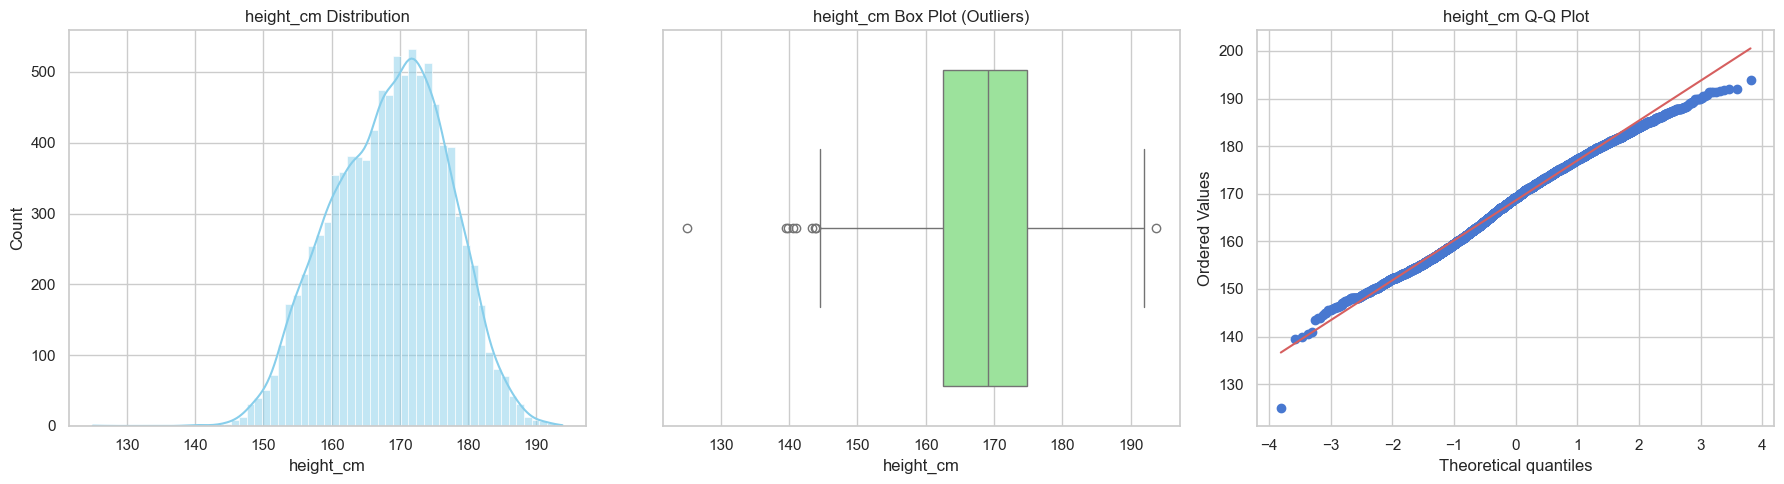

Statistics for height_cm:
 - Skewness: -0.1737 (0 = symmetric)
 - Kurtosis: -0.4216 (3 = normal for Pearson definition, 0 for Fisher)
 - Shapiro-Wilk Test: Statistic=0.9935, p-value=5.002e-21
   -> Distribution is NOT Normal (reject H0)
--------------------------------------------------------------------------------

Analyzing Feature: weight_kg


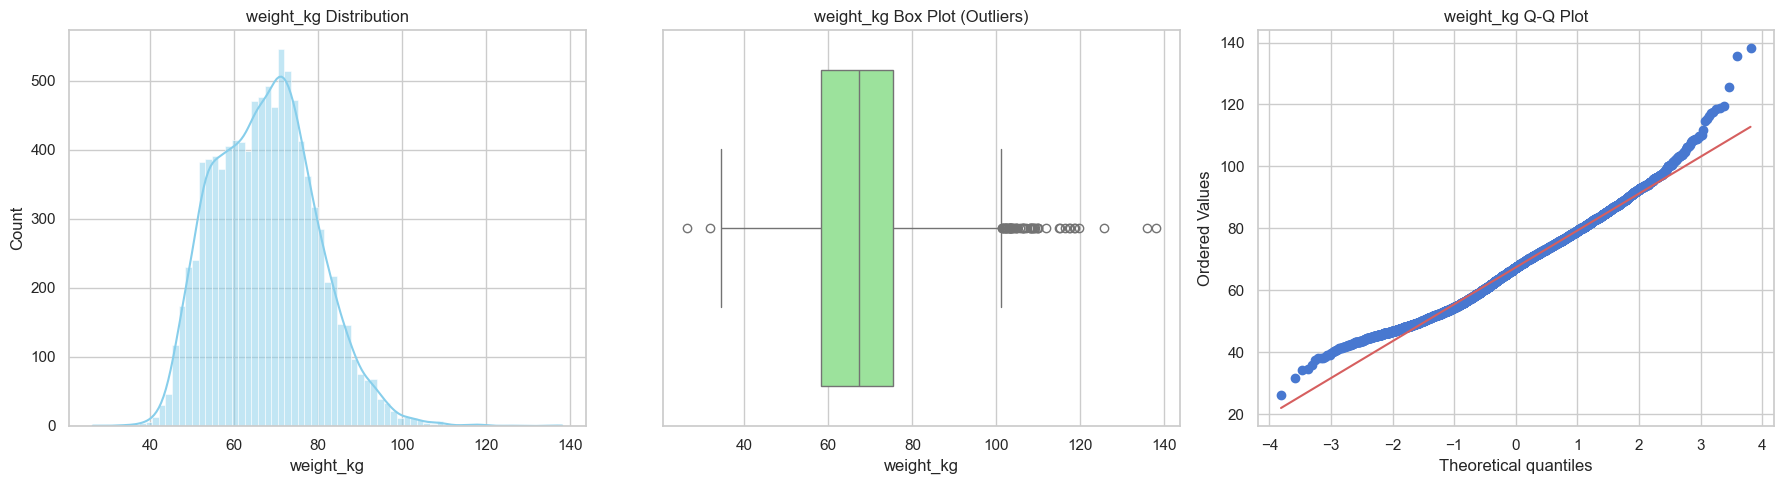

Statistics for weight_kg:
 - Skewness: 0.3441 (0 = symmetric)
 - Kurtosis: 0.1726 (3 = normal for Pearson definition, 0 for Fisher)
 - Shapiro-Wilk Test: Statistic=0.9891, p-value=4.631e-27
   -> Distribution is NOT Normal (reject H0)
--------------------------------------------------------------------------------

Analyzing Feature: body fat_%


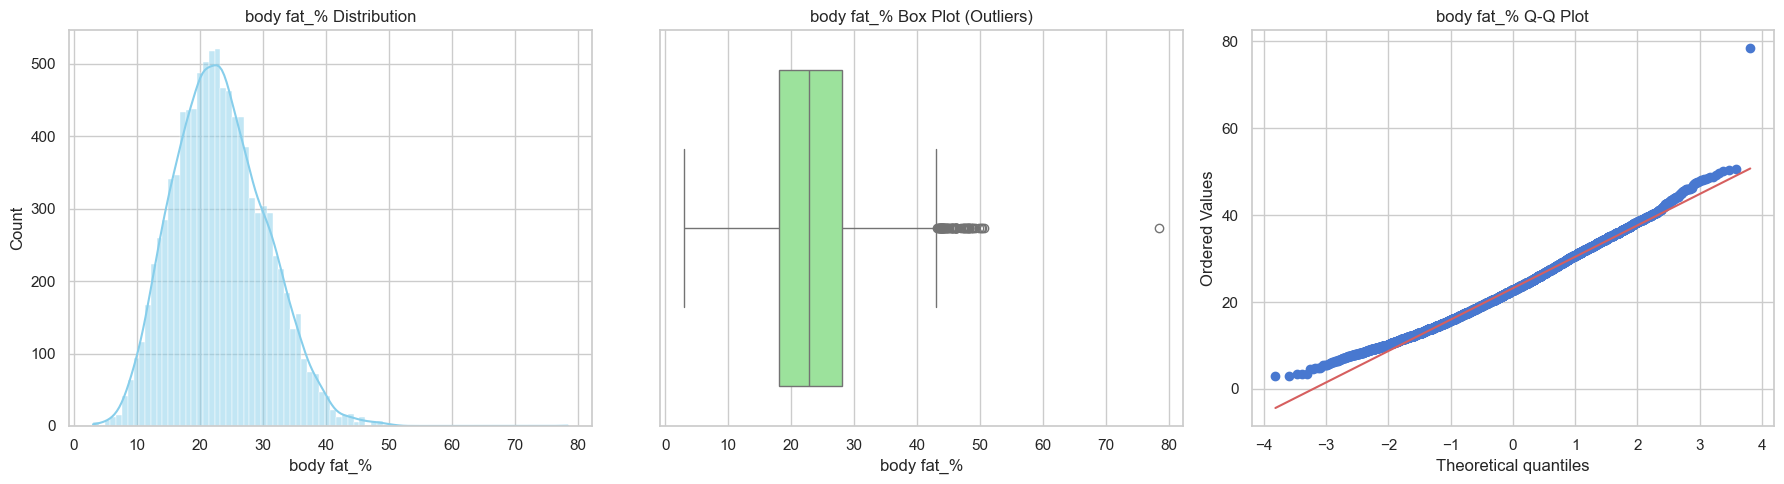

Statistics for body fat_%:
 - Skewness: 0.3511 (0 = symmetric)
 - Kurtosis: 0.1777 (3 = normal for Pearson definition, 0 for Fisher)
 - Shapiro-Wilk Test: Statistic=0.9914, p-value=4.183e-24
   -> Distribution is NOT Normal (reject H0)
--------------------------------------------------------------------------------

Analyzing Feature: diastolic


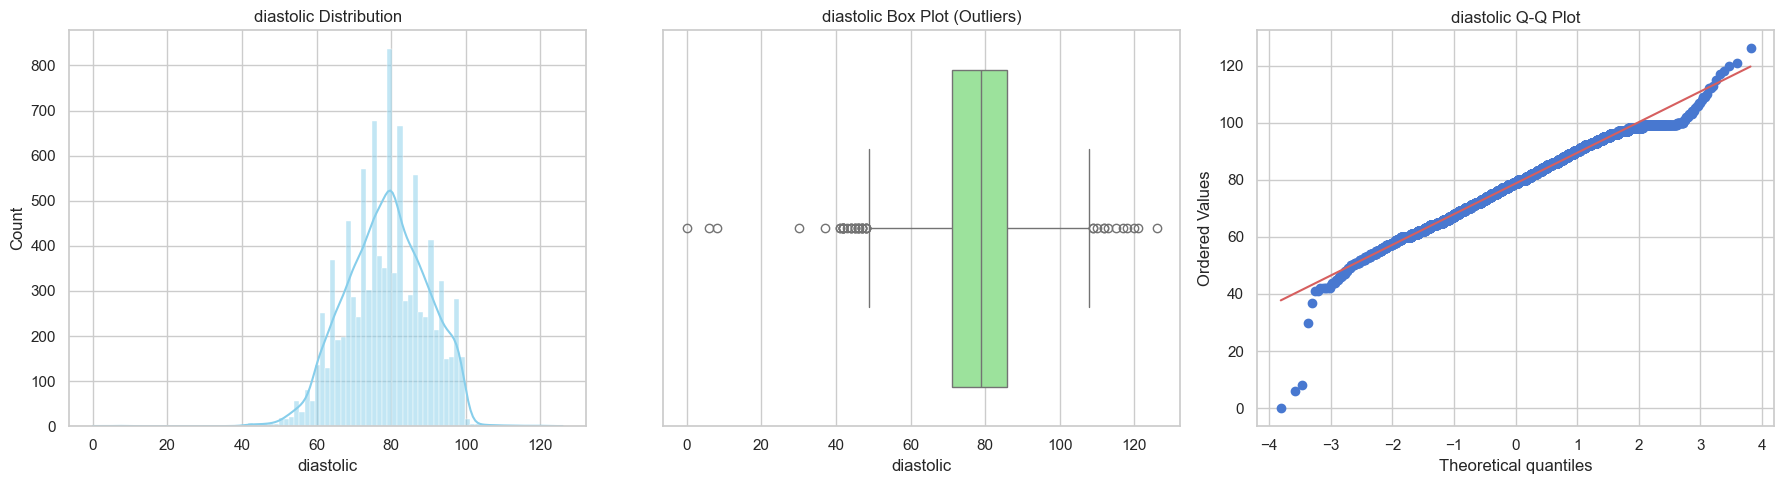

Statistics for diastolic:
 - Skewness: -0.2147 (0 = symmetric)
 - Kurtosis: 0.3636 (3 = normal for Pearson definition, 0 for Fisher)
 - Shapiro-Wilk Test: Statistic=0.9906, p-value=3.145e-25
   -> Distribution is NOT Normal (reject H0)
--------------------------------------------------------------------------------

Analyzing Feature: systolic


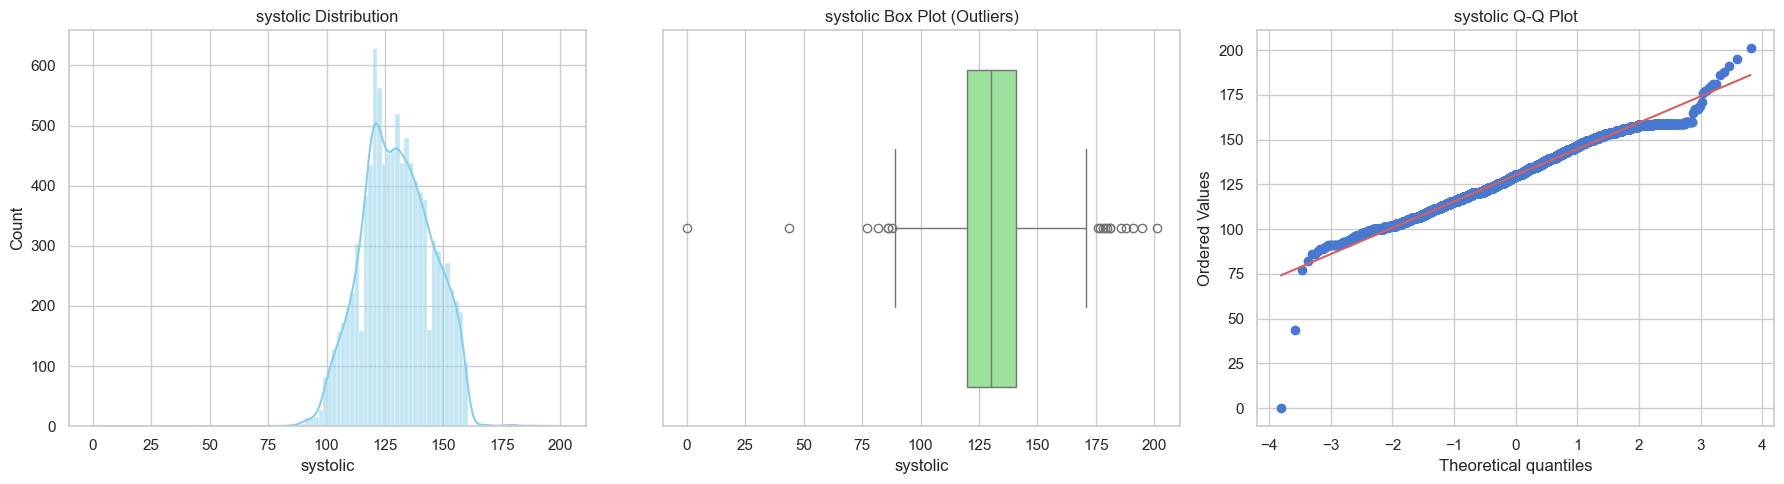

Statistics for systolic:
 - Skewness: -0.0418 (0 = symmetric)
 - Kurtosis: 0.2308 (3 = normal for Pearson definition, 0 for Fisher)
 - Shapiro-Wilk Test: Statistic=0.9889, p-value=2.983e-27
   -> Distribution is NOT Normal (reject H0)
--------------------------------------------------------------------------------

Analyzing Feature: gripForce


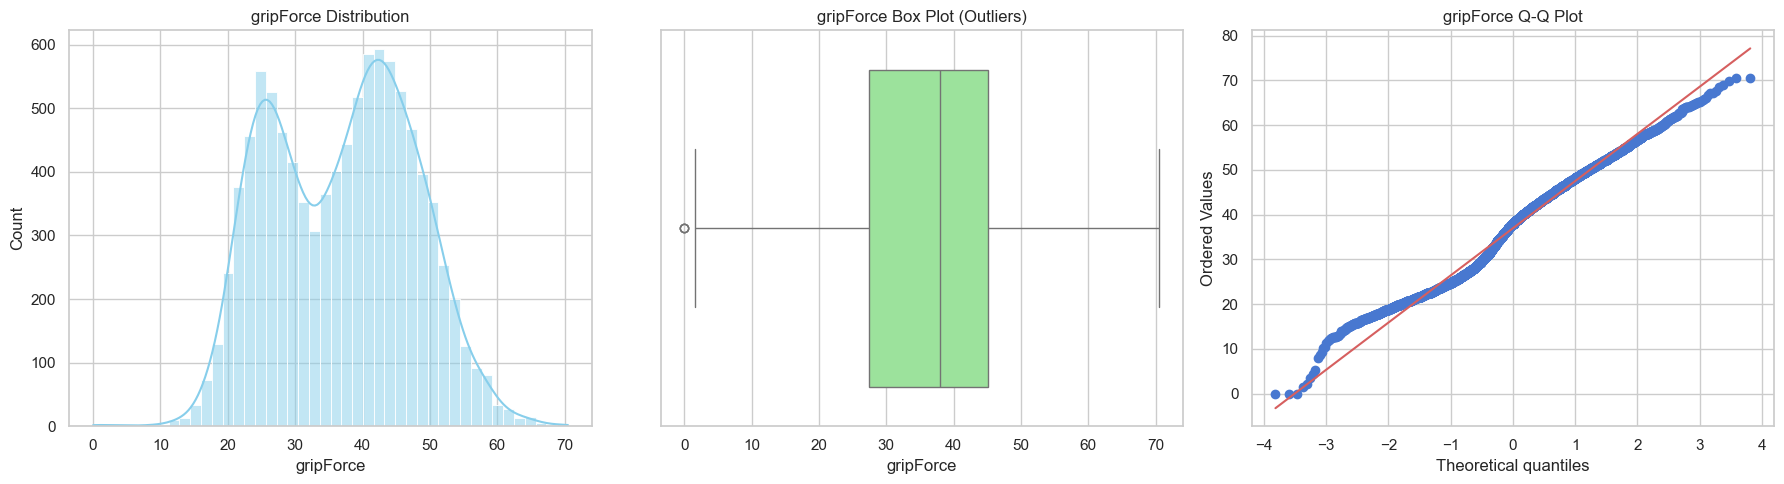

Statistics for gripForce:
 - Skewness: 0.0167 (0 = symmetric)
 - Kurtosis: -0.7928 (3 = normal for Pearson definition, 0 for Fisher)
 - Shapiro-Wilk Test: Statistic=0.9808, p-value=1.239e-34
   -> Distribution is NOT Normal (reject H0)
--------------------------------------------------------------------------------

Analyzing Feature: sit and bend forward_cm


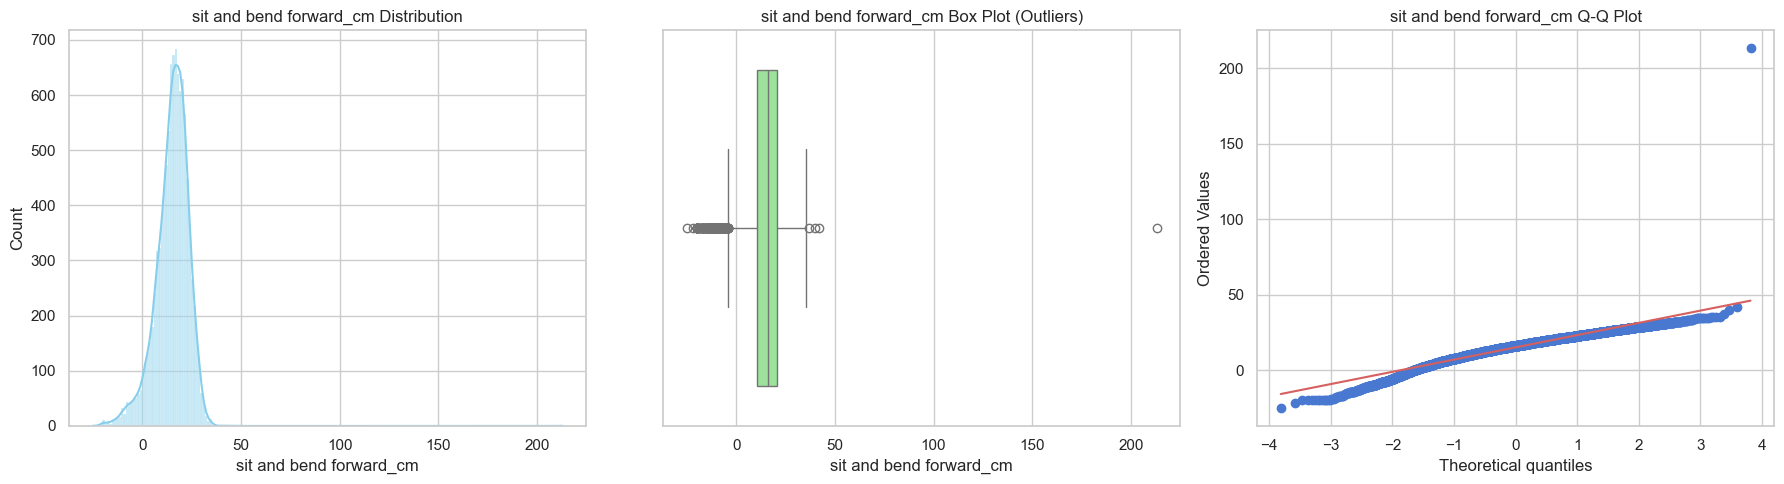

Statistics for sit and bend forward_cm:
 - Skewness: 0.4941 (0 = symmetric)
 - Kurtosis: 31.2111 (3 = normal for Pearson definition, 0 for Fisher)
 - Shapiro-Wilk Test: Statistic=0.9262, p-value=1.054e-56
   -> Distribution is NOT Normal (reject H0)
--------------------------------------------------------------------------------

Analyzing Feature: sit-ups counts


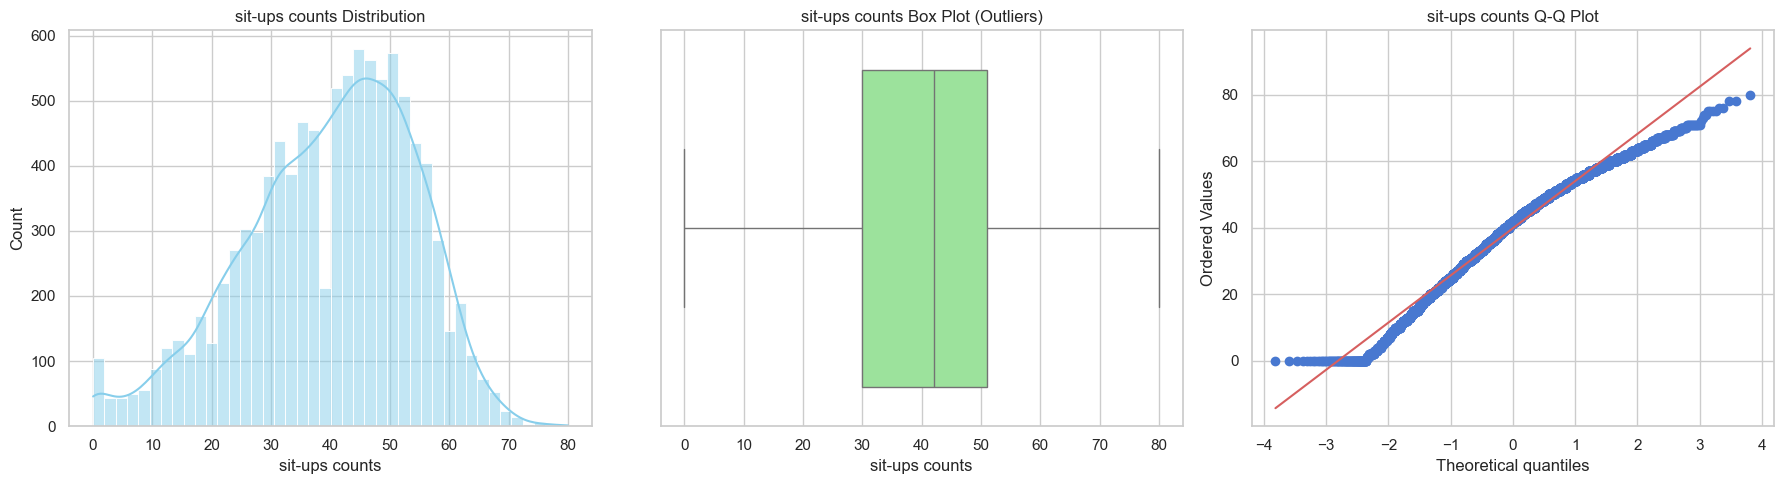

Statistics for sit-ups counts:
 - Skewness: -0.4742 (0 = symmetric)
 - Kurtosis: -0.1621 (3 = normal for Pearson definition, 0 for Fisher)
 - Shapiro-Wilk Test: Statistic=0.9805, p-value=6.868e-35
   -> Distribution is NOT Normal (reject H0)
--------------------------------------------------------------------------------

Analyzing Feature: broad jump_cm


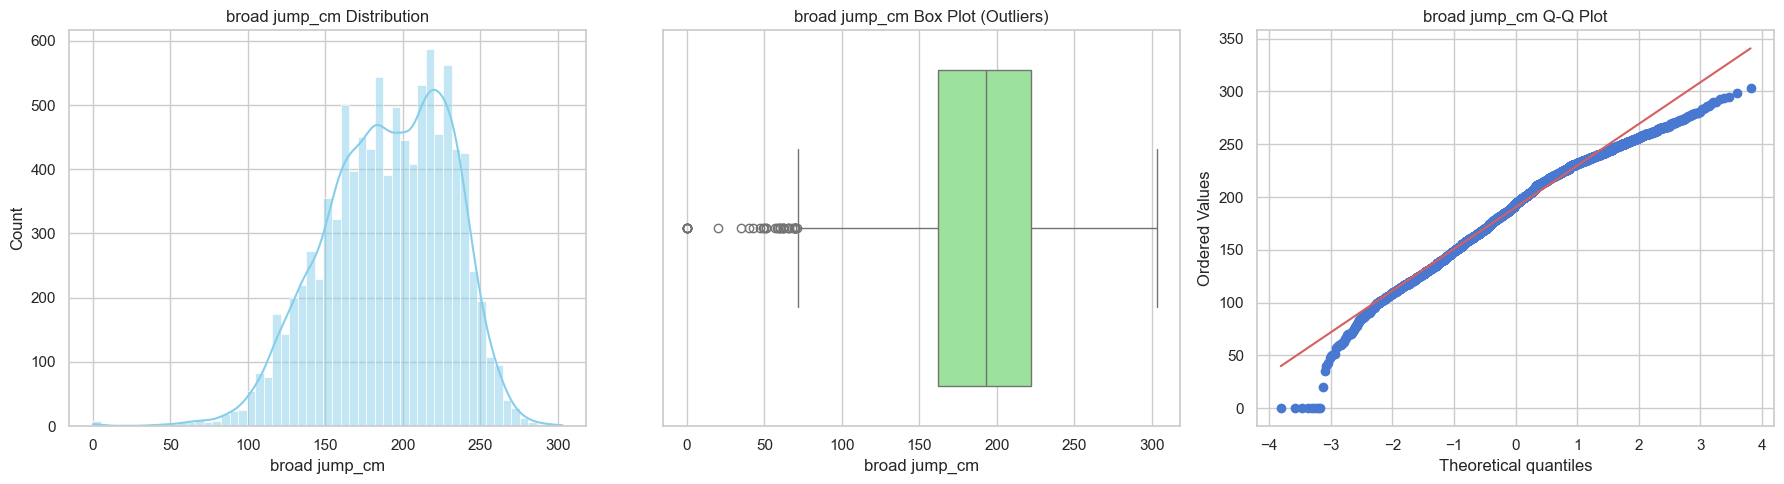

Statistics for broad jump_cm:
 - Skewness: -0.4277 (0 = symmetric)
 - Kurtosis: 0.0105 (3 = normal for Pearson definition, 0 for Fisher)
 - Shapiro-Wilk Test: Statistic=0.9835, p-value=1.538e-32
   -> Distribution is NOT Normal (reject H0)
--------------------------------------------------------------------------------

Analyzing Feature: gender_encoded


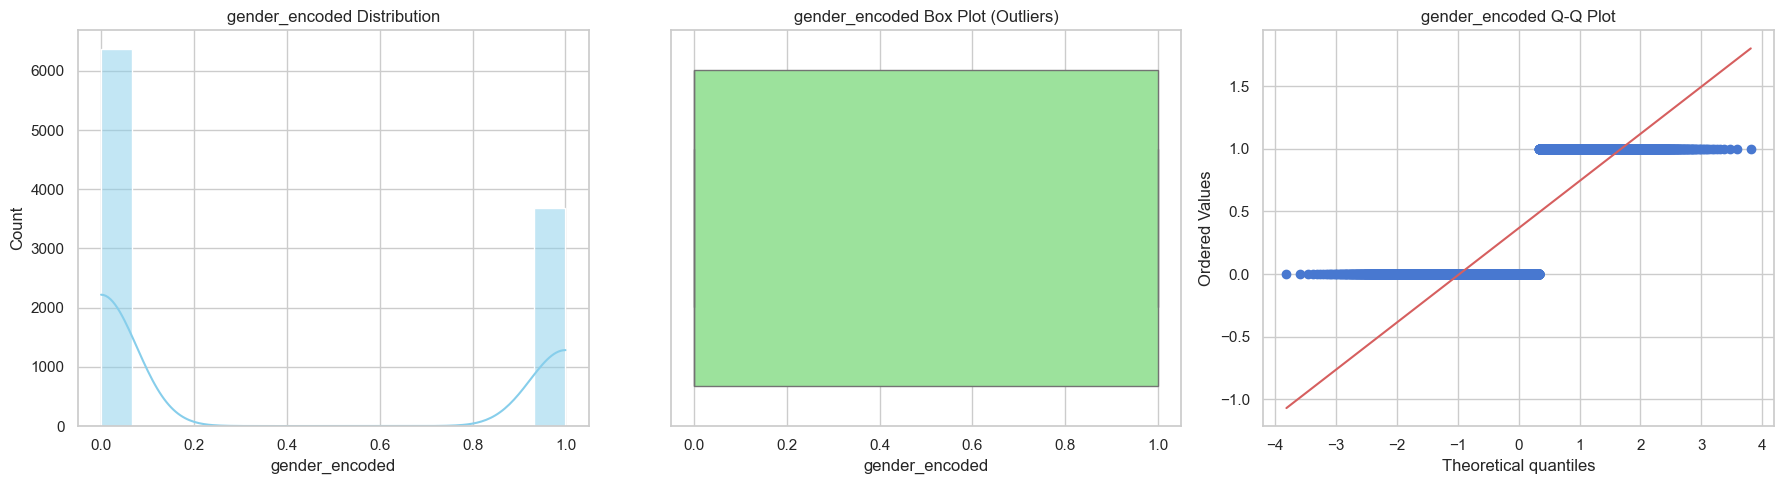

Statistics for gender_encoded:
 - Skewness: 0.5547 (0 = symmetric)
 - Kurtosis: -1.6926 (3 = normal for Pearson definition, 0 for Fisher)
 - Shapiro-Wilk Test: Statistic=0.6101, p-value=9.525e-92
   -> Distribution is NOT Normal (reject H0)
--------------------------------------------------------------------------------


In [112]:

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if 'class_encoded' in numeric_cols: numeric_cols.remove('class_encoded')

def plot_3_in_1(data, feature):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1. Histogram + KDE
    sns.histplot(data[feature], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'{feature} Distribution')

    # 2. Box Plot
    sns.boxplot(x=data[feature], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'{feature} Box Plot (Outliers)')

    # 3. Q-Q Plot
    stats.probplot(data[feature], dist="norm", plot=axes[2])
    axes[2].set_title(f'{feature} Q-Q Plot')

    plt.tight_layout()
    plt.show()

for col in numeric_cols:
    print(f"\nAnalyzing Feature: {col}")
    plot_3_in_1(df, col)

    # Statistical Normality Test (Shapiro-Wilk)
    stat, p = stats.shapiro(df[col])
    skewness = df[col].skew()
    kurtosis = df[col].kurt()

    print(f"Statistics for {col}:")
    print(f" - Skewness: {skewness:.4f} (0 = symmetric)")
    print(f" - Kurtosis: {kurtosis:.4f} (3 = normal for Pearson definition, 0 for Fisher)")
    print(f" - Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4g}")
    if p < 0.05:
        print("   -> Distribution is NOT Normal (reject H0)")
    else:
        print("   -> Distribution looks Normal (fail to reject H0)")
    print("-" * 80)

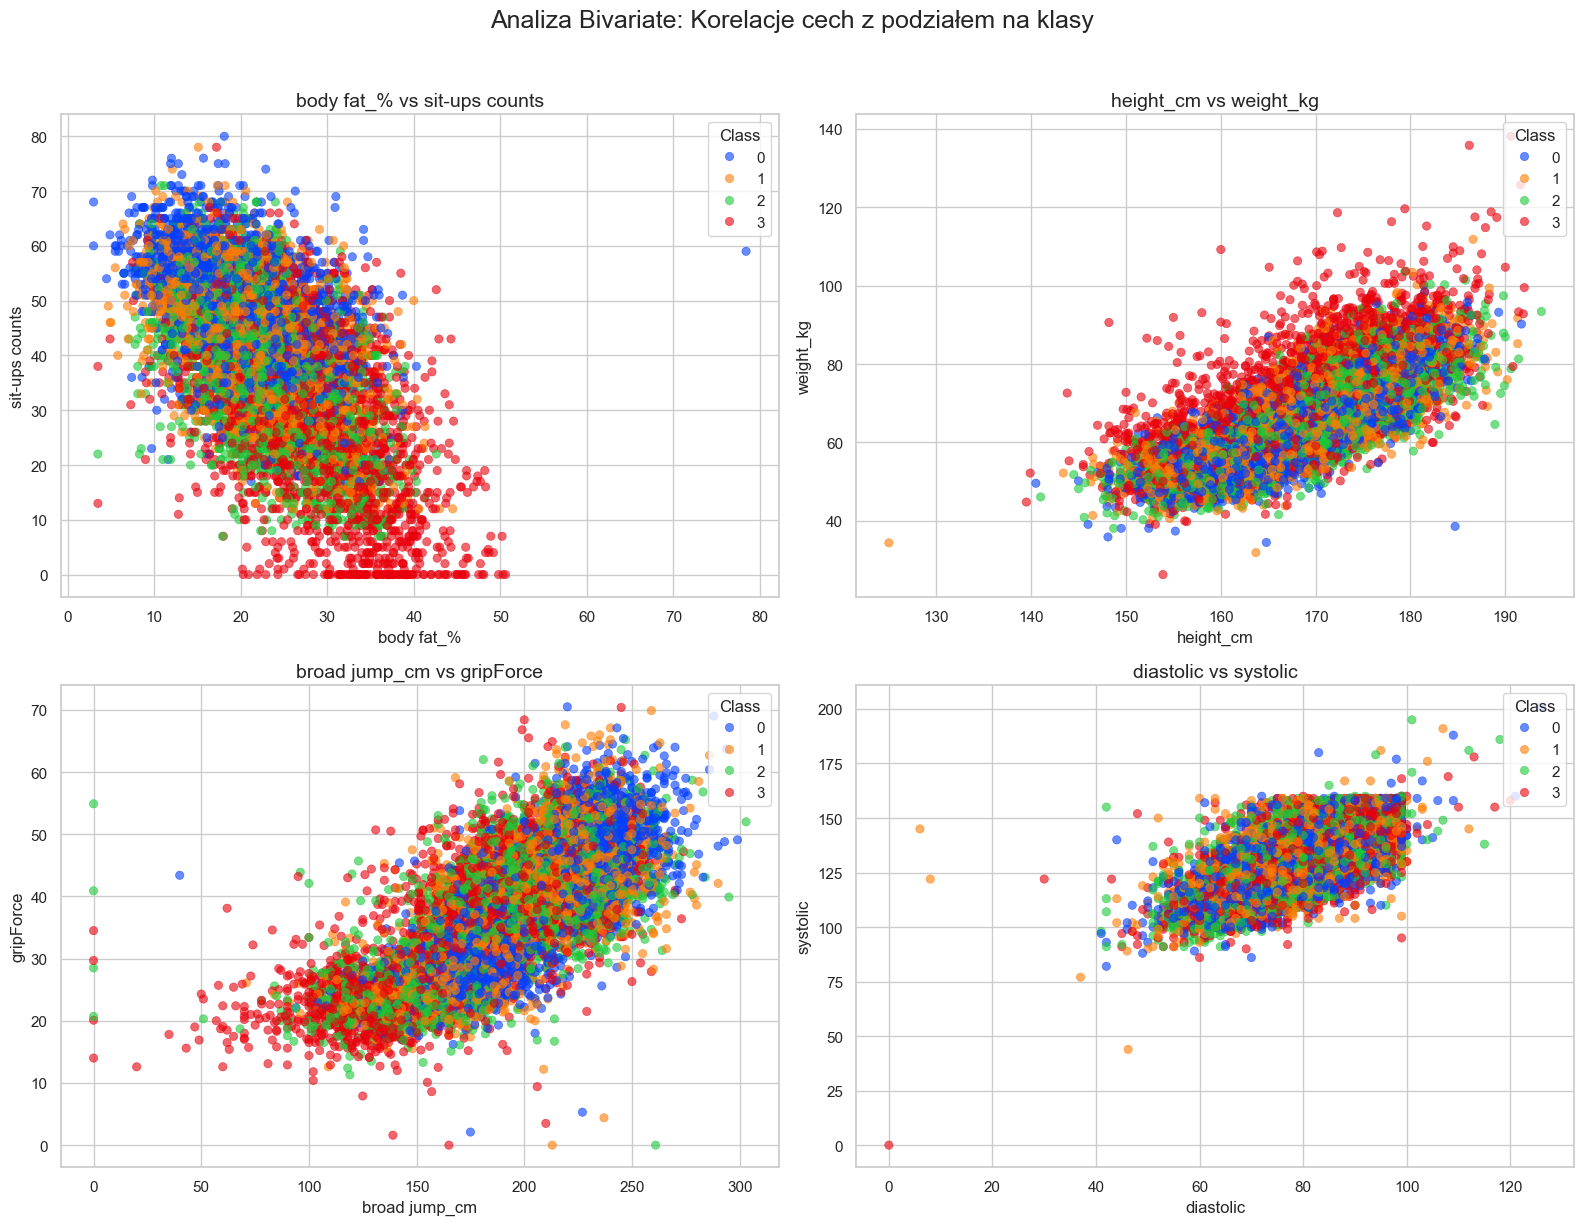

In [118]:
sns.set_theme(style="whitegrid")

pairs_to_plot = [
    ('body fat_%', 'sit-ups counts'),
    ('height_cm', 'weight_kg'),
    ('broad jump_cm', 'gripForce'),
    ('diastolic', 'systolic')
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(pairs_to_plot):
    if x_col in df.columns and y_col in df.columns:
        sns.scatterplot(
            data=df,
            x=x_col,
            y=y_col,
            hue='class_encoded',
            palette='bright',
            alpha=0.6,
            edgecolor=None,
            ax=axes[i]
        )
        axes[i].set_title(f'{x_col} vs {y_col}', fontsize=14)
        axes[i].legend(title='Class', loc='upper right')
    else:
        axes[i].text(0.5, 0.5, 'Brak danych kolumn w DF', ha='center')

plt.suptitle('Analiza Bivariate: Korelacje cech z podziałem na klasy', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

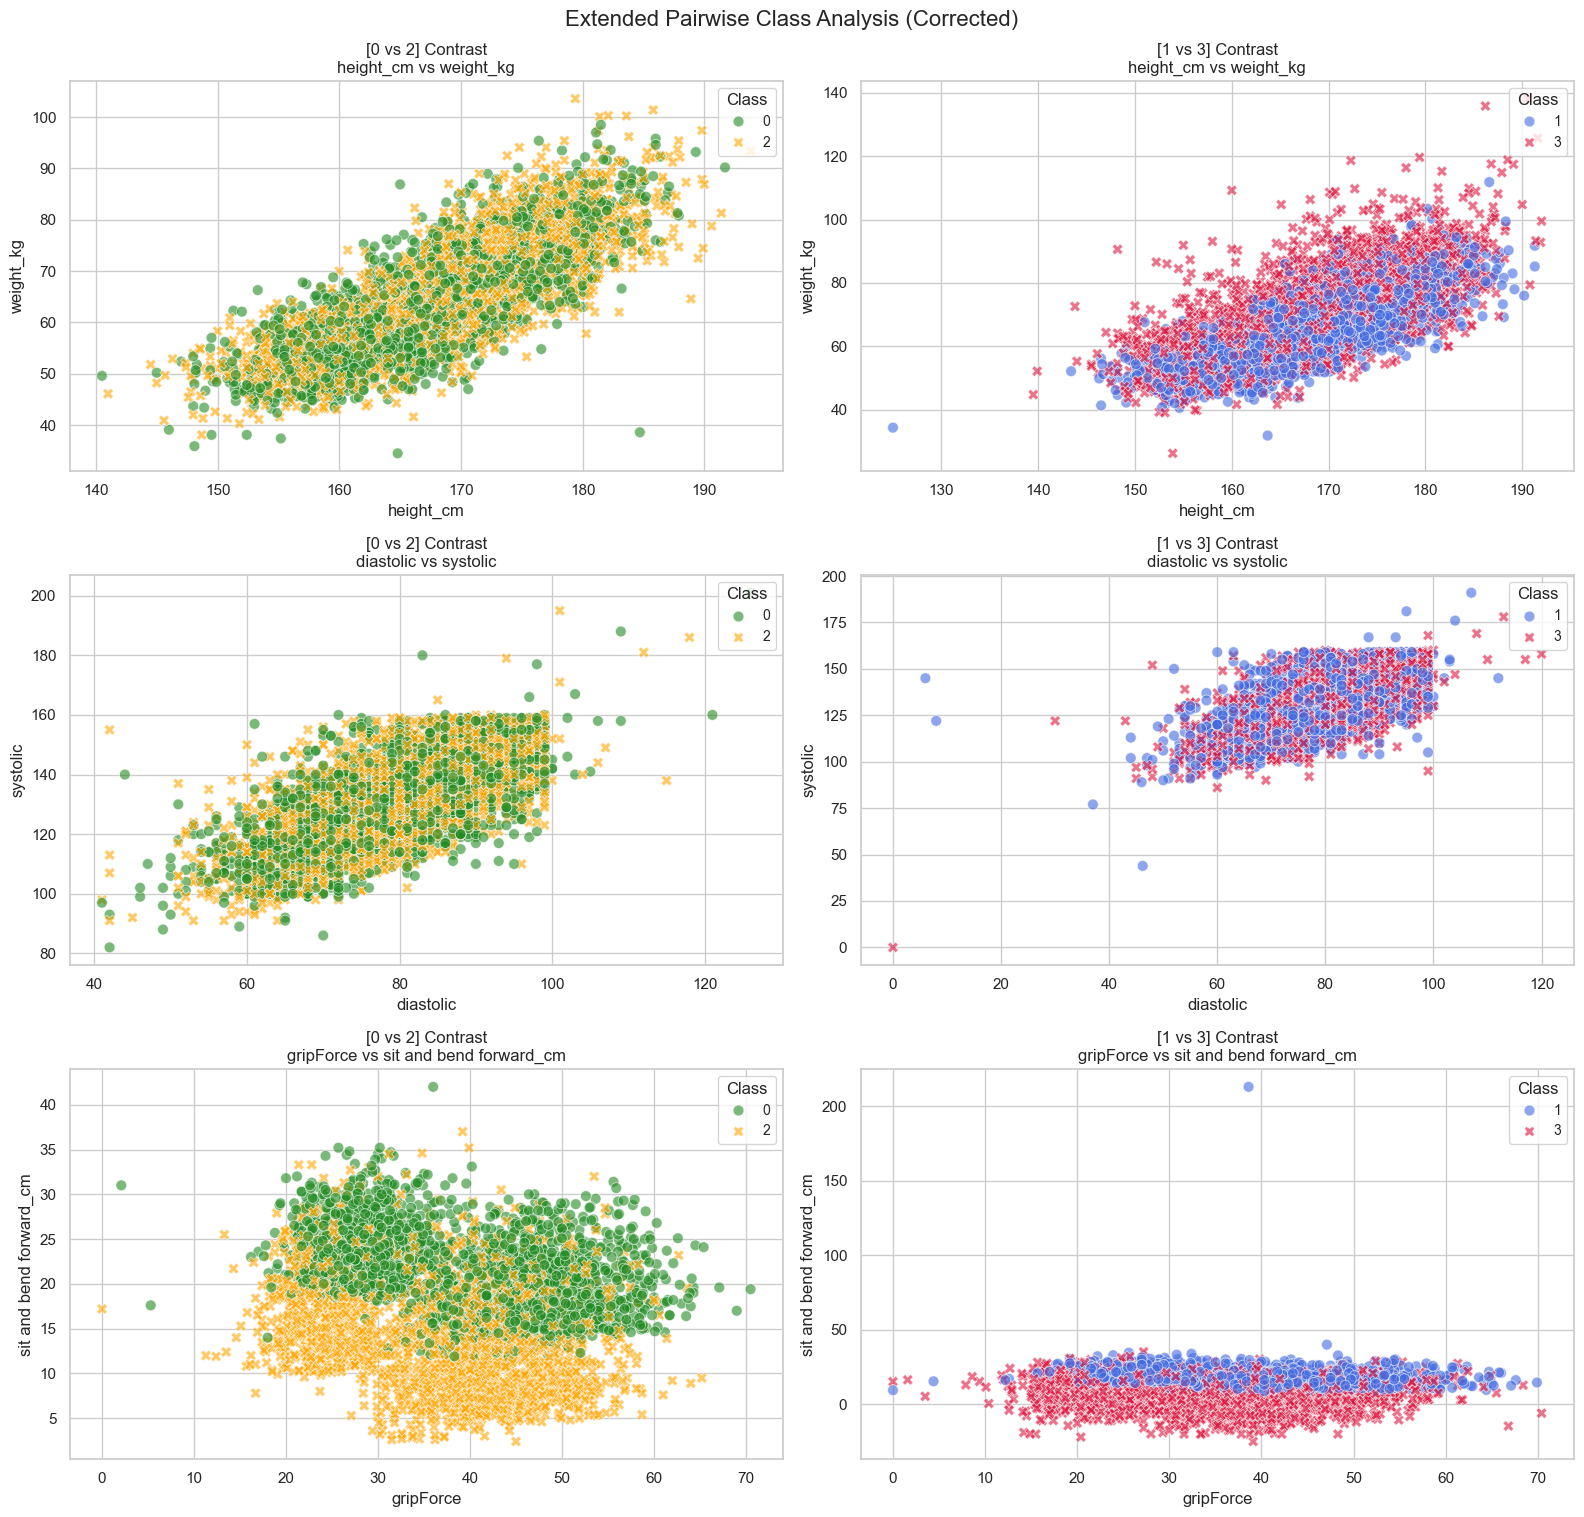

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

more_pairs = [
    ('height_cm', 'weight_kg'),
    ('diastolic', 'systolic'),
    ('gripForce', 'sit and bend forward_cm')
]

subset_02 = df[df['class_encoded'].isin([0, 2])].copy()
subset_13 = df[df['class_encoded'].isin([1, 3])].copy()

rows = len(more_pairs)
fig, axes = plt.subplots(rows, 2, figsize=(16, 5 * rows))

for i, (x_col, y_col) in enumerate(more_pairs):

    if x_col not in df.columns or y_col not in df.columns:
        print(f"Pominięto parę {x_col} vs {y_col} - brak kolumny w danych.")
        continue

    ax_left = axes[i, 0] if rows > 1 else axes[0]
    sns.scatterplot(
        data=subset_02,
        x=x_col, y=y_col,
        hue='class_encoded',
        palette={0: 'forestgreen', 2: 'orange'},
        style='class_encoded',
        alpha=0.6,
        s=60,
        ax=ax_left
    )
    ax_left.set_title(f'[0 vs 2] Contrast\n{x_col} vs {y_col}', fontsize=12)
    ax_left.legend(title='Class', loc='upper right', fontsize='small')

    ax_right = axes[i, 1] if rows > 1 else axes[1]
    sns.scatterplot(
        data=subset_13,
        x=x_col, y=y_col,
        hue='class_encoded',
        palette={1: 'royalblue', 3: 'crimson'},
        style='class_encoded',
        alpha=0.6,
        s=60,
        ax=ax_right
    )
    ax_right.set_title(f'[1 vs 3] Contrast\n{x_col} vs {y_col}', fontsize=12)
    ax_right.legend(title='Class', loc='upper right', fontsize='small')

plt.tight_layout()
fig.suptitle('Extended Pairwise Class Analysis (Corrected)', y=1.01, fontsize=16)
plt.show()

In [130]:
from scipy.stats import kruskal, chi2_contingency

print("--- Kruskal-Wallis Test Results (Non-parametric) ---")
for col in num_cols:
    groups = [df[df['class_encoded'] == c][col] for c in df['class_encoded'].unique()]
    stat, p = kruskal(*groups)
    print(f"{col:<25} | p-value: {p:.4e} {'*' if p < 0.05 else ''}")


--- Kruskal-Wallis Test Results (Non-parametric) ---
age                       | p-value: 2.5147e-07 *
height_cm                 | p-value: 2.3669e-09 *
weight_kg                 | p-value: 9.0778e-91 *
body fat_%                | p-value: 3.7254e-280 *
diastolic                 | p-value: 1.6189e-10 *
systolic                  | p-value: 6.9227e-05 *
gripForce                 | p-value: 1.9666e-40 *
sit and bend forward_cm   | p-value: 0.0000e+00 *
sit-ups counts            | p-value: 0.0000e+00 *
broad jump_cm             | p-value: 1.0277e-129 *
gender_encoded            | p-value: 1.7820e-19 *


--- Chi-Square Test: Gender vs Class ---
Chi2 Stat: 90.43
p-value: 1.7740e-19 (Significant)


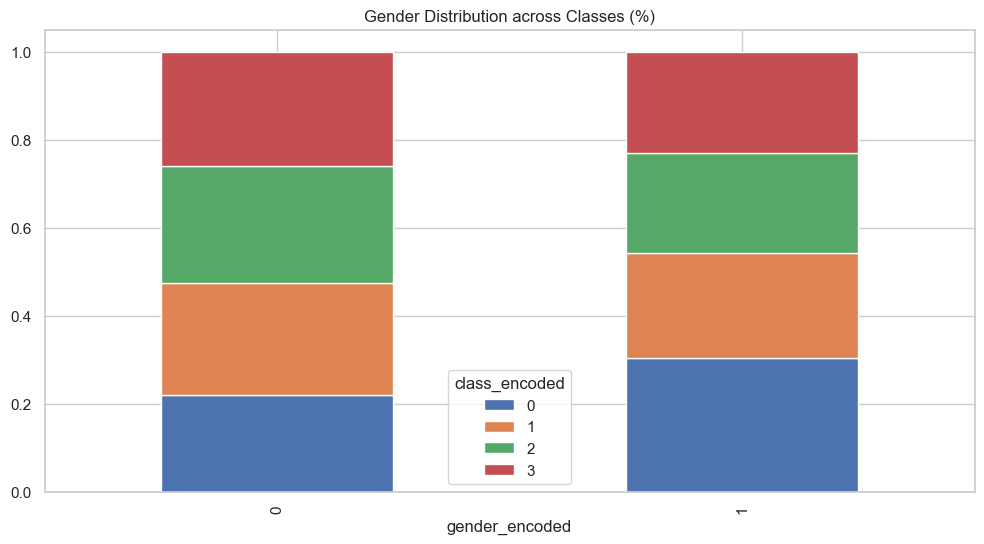

In [128]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['gender_encoded'], df['class_encoded'])
stat, p, dof, expected = chi2_contingency(contingency)

print(f"--- Chi-Square Test: Gender vs Class ---")
print(f"Chi2 Stat: {stat:.2f}")
print(f"p-value: {p:.4e} {'(Significant)' if p < 0.05 else '(Independent)'}")

contingency.div(contingency.sum(1), axis=0).plot(kind='bar', stacked=True)
plt.title("Gender Distribution across Classes (%)")
plt.show()

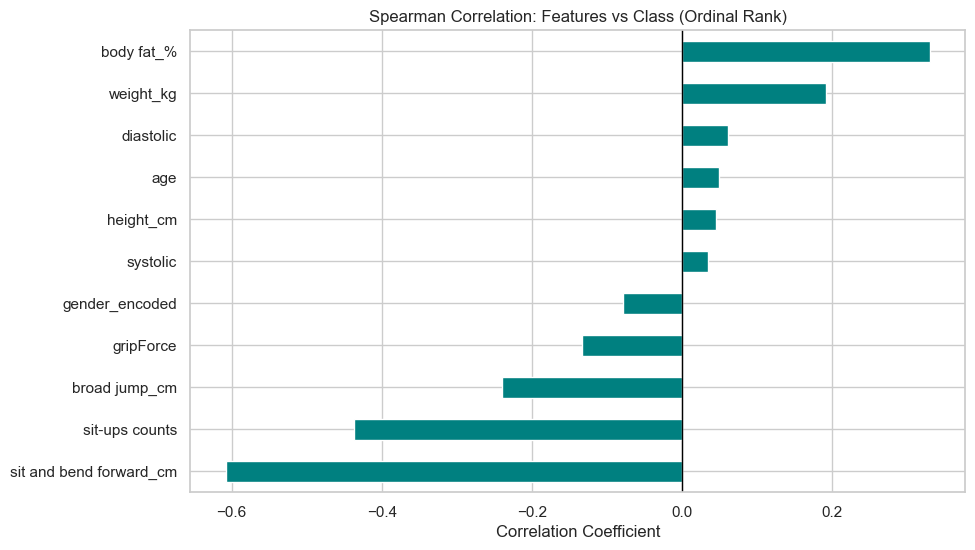


Top Spearman Correlations:
sit and bend forward_cm   -0.607924
sit-ups counts            -0.437349
broad jump_cm             -0.239634
gripForce                 -0.133306
gender_encoded            -0.078305
systolic                   0.035111
height_cm                  0.045269
age                        0.048947
diastolic                  0.060625
weight_kg                  0.192129
body fat_%                 0.330540
Name: class_encoded, dtype: float64


In [129]:
spearman_corr = df[num_cols + ['class_encoded']].corr(method='spearman')['class_encoded'].drop('class_encoded')

spearman_corr.sort_values().plot(kind='barh', color='teal', figsize=(10, 6))
plt.axvline(0, color='black', lw=1)
plt.title("Spearman Correlation: Features vs Class (Ordinal Rank)")
plt.xlabel("Correlation Coefficient")
plt.show()

print("\nTop Spearman Correlations:")
print(spearman_corr.sort_values())